In [154]:
import pandas as pd

In [155]:
table = pd.read_csv("./data.csv")

In [156]:
x = table.iloc[:, [0]]


In [157]:
y = table.iloc[:, [-1]]


In [158]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)
y_normalized = scaler.fit_transform(y)

In [159]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales')

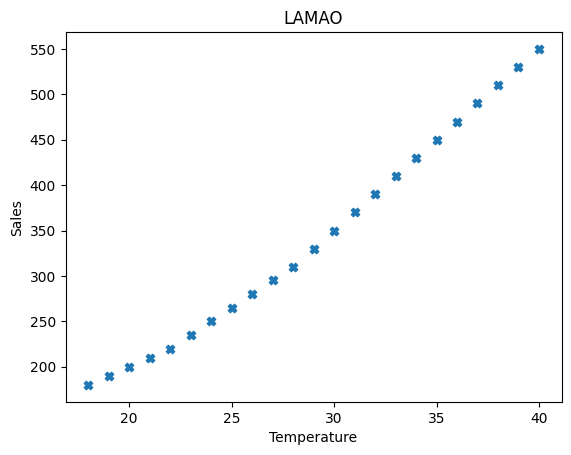

In [160]:
plt.scatter(x, y, marker="X")
plt.title("LAMAO")
plt.xlabel("Temperature")
plt.ylabel("Sales")

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_normalized, random_state=42)
model = LinearRegression()
model.fit(pd.DataFrame(x_train, columns=x.columns), pd.DataFrame(y_train, columns=y.columns))
y_pred = model.predict(pd.DataFrame(x_test, columns=x.columns))
y_pred

array([[ 0.63593243],
       [ 0.35021429],
       [-0.07836293],
       [ 0.30259459],
       [ 0.73117181],
       [ 0.49307336]])

In [163]:
comparison = pd.DataFrame({
    "Actual": y_test.ravel(),
    "Predicted": y_pred.ravel()
})

comparison["Error"] = comparison["Predicted"] - comparison["Actual"]
comparison

,Actual,Predicted,Error
0,0.621622,0.635932,0.014311
1,0.310811,0.350214,0.039403
2,0.000000,-0.078363,-0.078363
3,0.270270,0.302595,0.032324
4,0.729730,0.731172,0.001442
5,0.459459,0.493073,0.033614


In [164]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae

0.03324292149292168

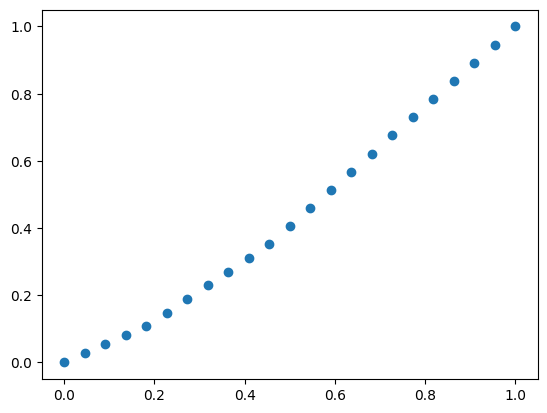

In [165]:
plt.scatter(x_normalized, y_normalized)

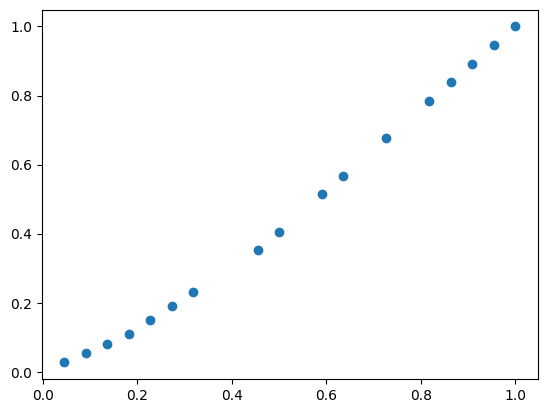

In [166]:
plt.scatter(x_train, y_train)


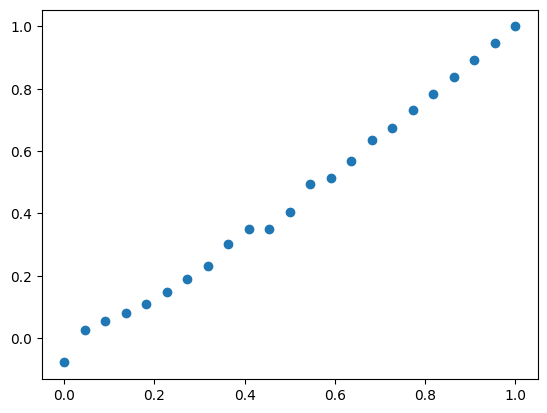

In [169]:
x_df = pd.DataFrame(x_train, columns=['Temperature'])
x_test_df = pd.DataFrame(x_test, columns=['Temperature'])

y_df = pd.DataFrame(y_train, columns=['Ice Cream Sales'])
y_pred_df = pd.DataFrame(y_pred, columns=['Ice Cream Sales'])

x_all = pd.concat([x_df, x_test_df])
y_all = pd.concat([y_df, y_pred_df])

plt.scatter(x_all, y_all)